<a href="https://colab.research.google.com/github/saisiddharthnandhakumar/SpaceshipTitanicKaggle/blob/main/spaceship_titanic_testrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [22]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'train_test'],
      dtype='object')

In [5]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])


In [6]:
all_data

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test,Survived
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,NaN
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,NaN
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,NaN
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,NaN
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,0,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,0,NaN


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train.describe().columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'train_test'],
      dtype='object')

In [9]:
train.dtypes


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
train_test        int64
dtype: object

In [10]:
df_num = train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [11]:
df_cat = train[['HomePlanet','CryoSleep','Cabin','Destination','VIP','Transported']]

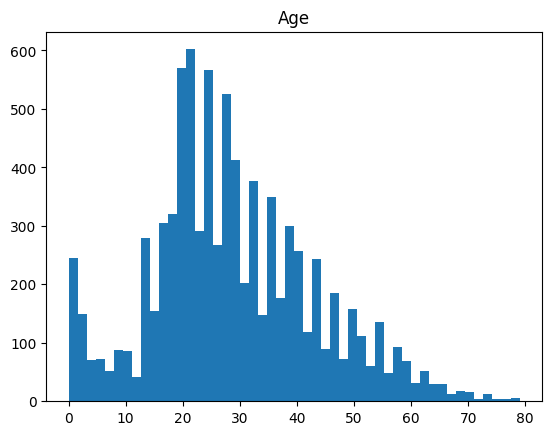

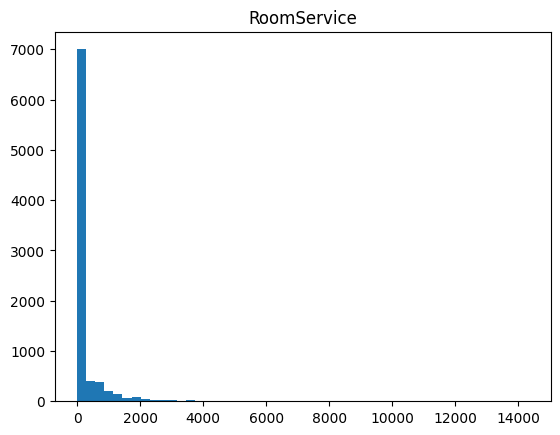

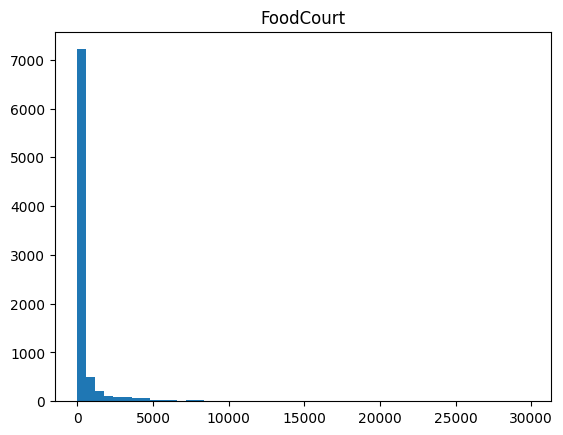

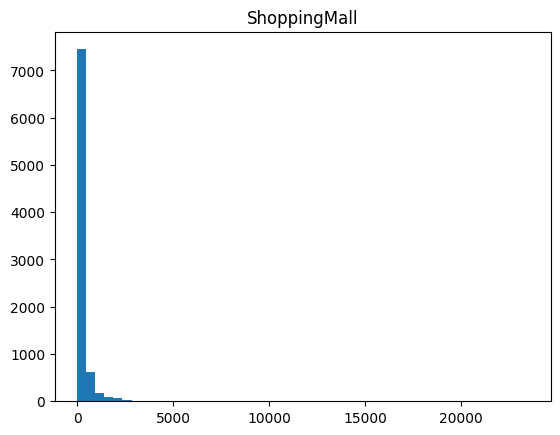

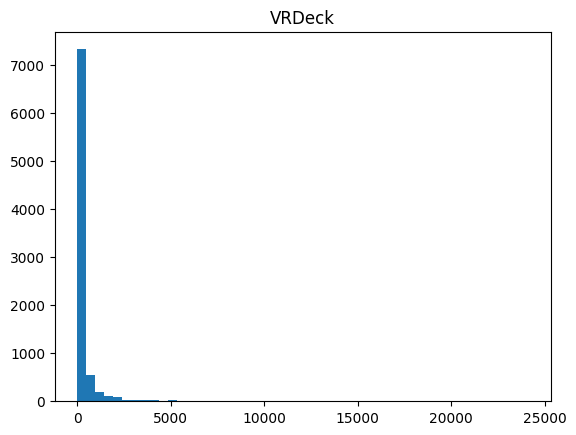

In [12]:
for i in df_num.columns:
  plt.hist(df_num[i], bins = 50)
  plt.title(i)
  plt.show()

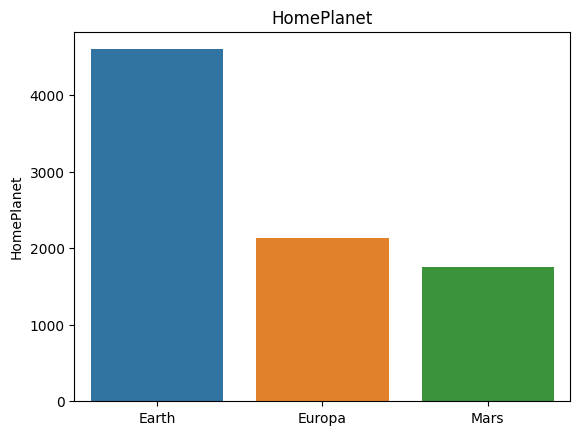

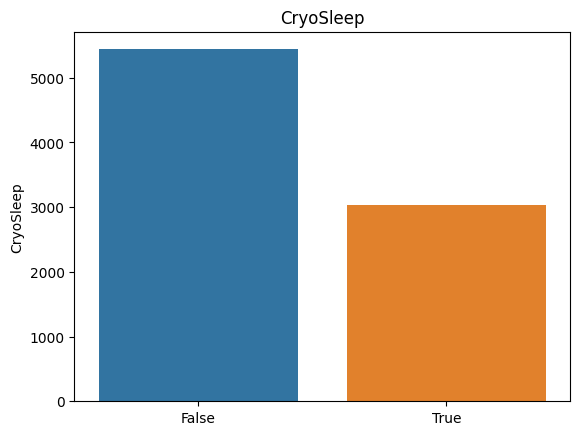

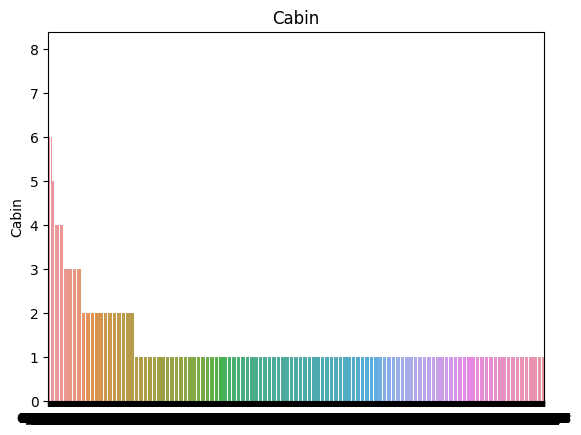

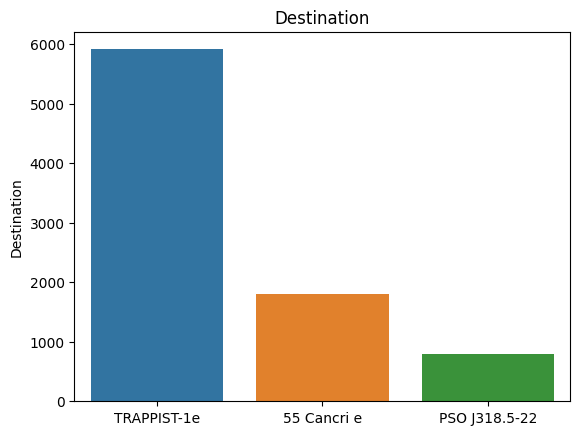

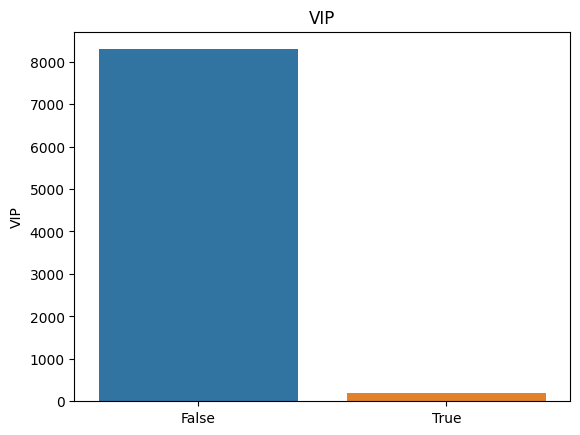

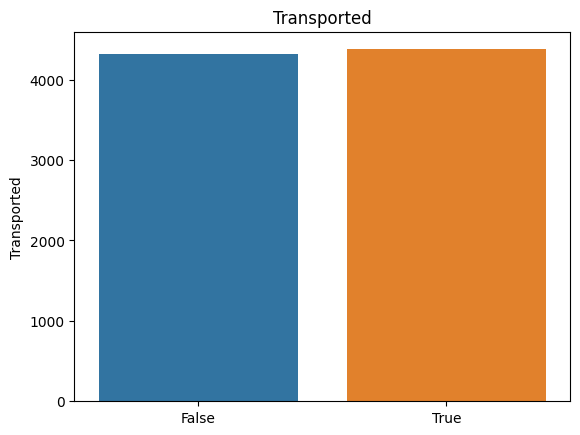

In [13]:
for i in df_cat.columns:
  sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts(), data = train).set_title(i)
  plt.show()

In [14]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
train_test        0
dtype: int64

In [15]:
len(train)

8693

In [16]:
test.isna().sum()

PassengerId        0
HomePlanet        87
CryoSleep         93
Cabin            100
Destination       92
Age               91
VIP               93
RoomService       82
FoodCourt        106
ShoppingMall      98
Spa              101
VRDeck            80
Name              94
train_test         0
Survived        4277
dtype: int64

In [17]:
#Imputing Null values for Numerical Features
train.Age = train.Age.fillna(train.Age.mean())
train.RoomService = train.RoomService.fillna(train.RoomService.median())
train.FoodCourt = train.FoodCourt.fillna(train.FoodCourt.median())
train.ShoppingMall = train.ShoppingMall.fillna(train.ShoppingMall.median())
train.Spa = train.Spa.fillna(train.Spa.median())
train.VRDeck = train.VRDeck.fillna(train.VRDeck.median())


In [18]:
#Imputing Null values for Categorical Features
train.HomePlanet = train.HomePlanet.fillna(train.HomePlanet.mode().iloc[0])
train.CryoSleep = train.CryoSleep.fillna(train.CryoSleep.mode().iloc[0])
train.Cabin = train.Cabin.fillna(train.Cabin.mode().iloc[0])
train.Destination = train.Destination.fillna(train.Destination.mode().iloc[0])
train.VIP = train.VIP.fillna(train.VIP.mode().iloc[0])


In [19]:
train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
train_test        0
dtype: int64

In [20]:
#for column in df_num:
#    train[column] = np.log1p(train[column])

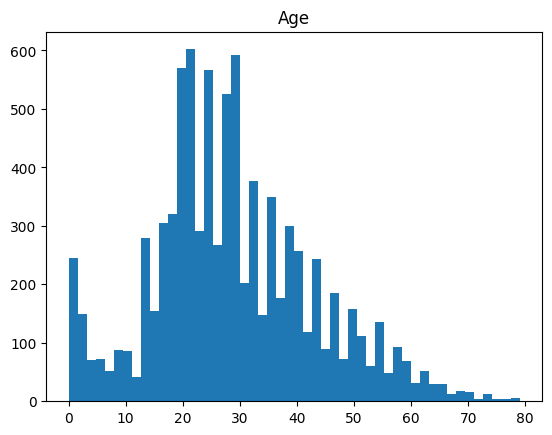

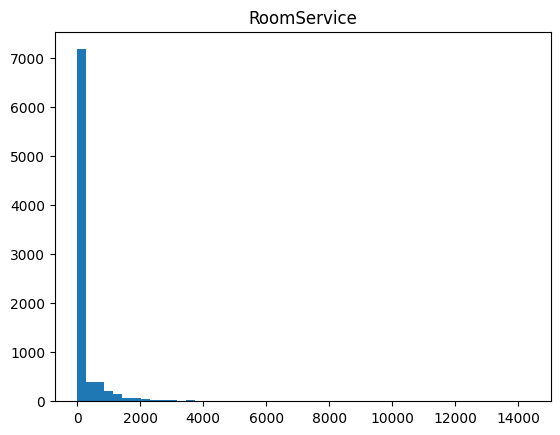

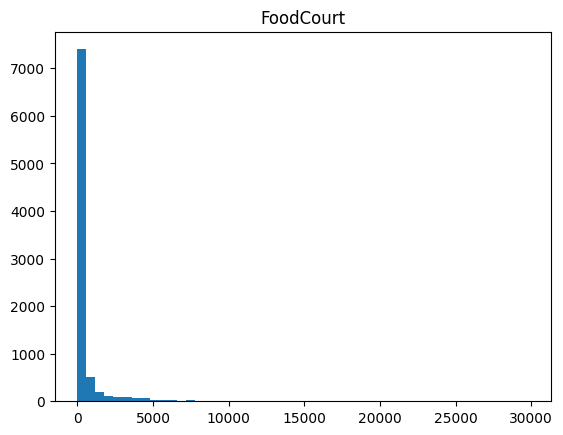

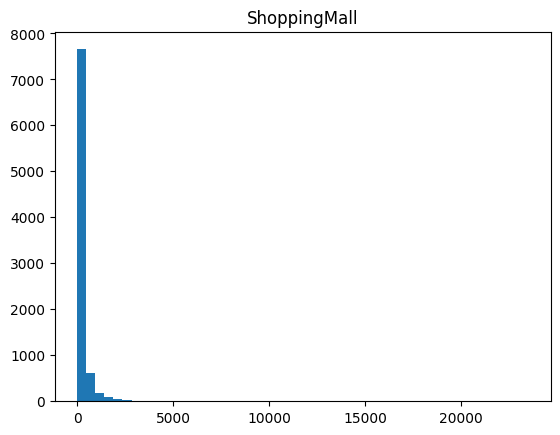

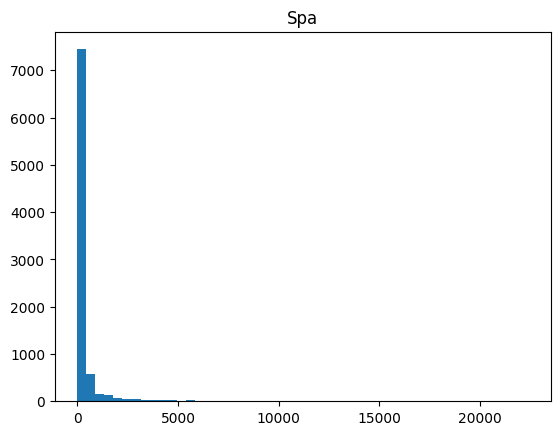

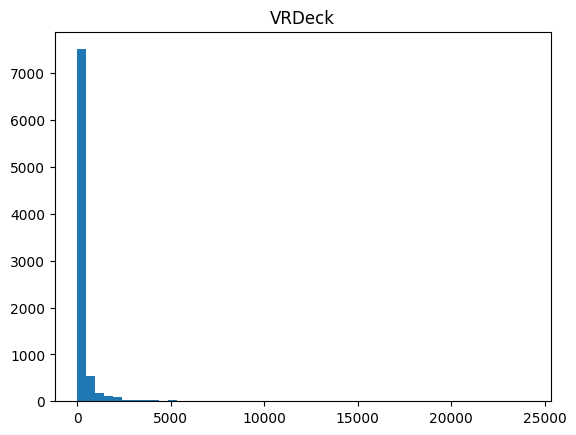

In [21]:
for i in df_num.columns:
  plt.hist(train[i], bins = 50)
  plt.title(i)
  plt.show()

In [30]:
train['VRDecklog'] = np.log1p(train['VRDeck']+5)

Text(0.5, 1.0, 'VRDeck')

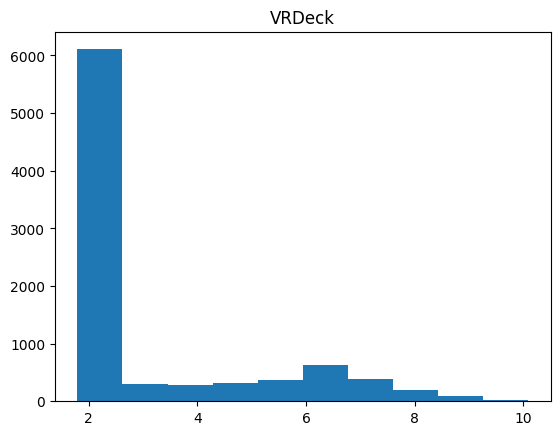

In [31]:
plt.hist(train.VRDecklog)
plt.title('VRDeck')

In [32]:
from sklearn.preprocessing import PowerTransformer

# Create an instance of PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # Choose 'yeo-johnson' or 'box-cox'

# Fit the transformer on your numerical feature data
pt.fit(train[['VRDeck']])  # Replace 'Feature1' with the actual column name

# Transform the feature
train['VRDeckpower'] = pt.transform(train[['VRDeck']])

Text(0.5, 1.0, 'VRDeck')

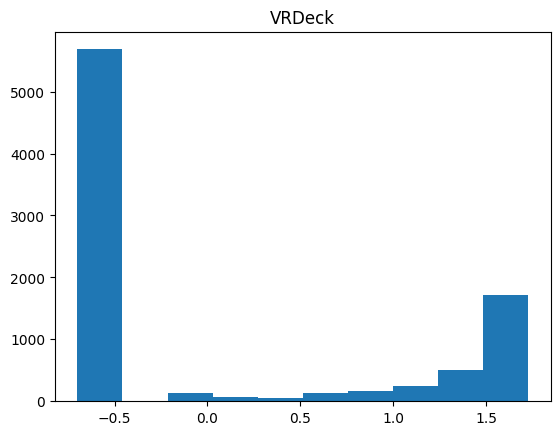

In [33]:
plt.hist(train.VRDeckpower)
plt.title('VRDeck')